#### Importando as bibliotecas

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### EDA

Carregando datasets

In [147]:
# carregando a base de quantidade de pessoas por pais e por ano
dados_populacao = pd.read_csv(r'Dados\cleaned_data_Task1.csv', sep=',')
display(dados_populacao.head(3))

print('-'*25)
print(f'Número de linhas: {dados_populacao.shape[0]}')
print(f'Número de colunas: {dados_populacao.shape[1]}')

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0


-------------------------
Número de linhas: 266
Número de colunas: 64


In [148]:
# a variavel categorica ano veio nas colunas
# transformando as colunas em linhas
dados_populacao = dados_populacao.melt(id_vars='Country Name', var_name='Year', value_name='Population')
display(dados_populacao.head(3))

print('-'*50)

# verificando a serie temporal de dados
print(f'Primeira data: {dados_populacao['Year'].min()}')
print(f'Última data: {dados_populacao['Year'].max()}')

,Country Name,Year,Population
0,Aruba,1960,54608.0
1,Africa Eastern and Southern,1960,130692579.0
2,Afghanistan,1960,8622466.0


--------------------------------------------------
Primeira data: 1960
Última data: 2022


In [149]:
# carregando a base com indices economicos por pais e por ano
dados_economicos = pd.read_csv(r'Dados\countries_gdp_hist.csv', sep=';')
display(dados_economicos.head(3))

print('-'*25)
print(f'Número de linhas: {dados_economicos.shape[0]}')
print(f'Número de colunas: {dados_economicos.shape[1]}')

print('-'*50)

# verificando a serie temporal dos dados
print(f'Primeira data: {dados_economicos['year'].min()}')
print(f'Última data: {dados_economicos['year'].max()}')

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,0.0


-------------------------
Número de linhas: 13330
Número de colunas: 10
--------------------------------------------------
Primeira data: 1960
Última data: 2021


O dataset de dados economicos possui dados somente ate 2021, como não tenho base de dados de 2022 vou replicar os dados de 2021 para 2022 e ter uma estimativa dos indices

In [150]:
# criando um df com dados de 2022 e depois acrescentando ao df original
dados_economicos_2022 = dados_economicos[dados_economicos['year'] == 2021]
dados_economicos_2022['year'] = 2022
dados_economicos = pd.concat([dados_economicos, dados_economicos_2022], axis=0)
display(dados_economicos.head(3))

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,0.0


Criando um df com dados de populacao e indices economicos

In [151]:
print(dados_populacao.dtypes)
print('-'*25)
print(dados_economicos.dtypes)

Country Name     object
Year             object
Population      float64
dtype: object
-------------------------
country_code            object
region_name             object
sub_region_name         object
intermediate_region     object
country_name            object
income_group            object
year                     int64
total_gdp              float64
total_gdp_million      float64
gdp_variation          float64
dtype: object


A variavel 'year' do df de dados economicos esta como 'int64' e a variavel 'Year' do df de dados de populacao como 'object', portanto vou deixar ambas as variáveis como 'int64', pois quero criar um df mesclando esses dois datasets e a variavel 'year' fara parte da chave

In [152]:
dados_populacao['Year'] = dados_populacao['Year'].astype('int64')

In [153]:
dados = pd.merge(dados_populacao, dados_economicos, left_on=['Country Name', 'Year'], right_on=['country_name', 'year'])
display(dados.head(5))

,Country Name,Year,Population,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,Aruba,1960,54608.0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.000000e+00,0.000000,0.0
1,Afghanistan,1960,8622466.0,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo,1960,5.377778e+08,537.777811,0.0
2,Angola,1960,5357195.0,AGO,Africa,Sub-Saharan Africa,Middle Africa,Angola,Países de ingreso mediano bajo,1960,0.000000e+00,0.000000,0.0
3,Albania,1960,1608800.0,ALB,Europe,Southern Europe,no data,Albania,Ingreso mediano alto,1960,0.000000e+00,0.000000,0.0
4,Andorra,1960,9443.0,AND,Europe,Southern Europe,no data,Andorra,Ingreso alto,1960,0.000000e+00,0.000000,0.0


Tratamento dos dados

In [154]:
# selecionando as colunas que serão utilizadas
dados = dados[['region_name', 'Country Name', 'Year', 'Population', 'total_gdp_million']]

# renomeando as colunas
dados.columns = ['region_name', 'country_name', 'year', 'population', 'total_gdp_million']

In [155]:
# tamanho do dataset
print(f'Número de linhas: {dados.shape[0]:,}')
print(f'Número de colunas: {dados.shape[1]}')

Número de linhas: 11,655
Número de colunas: 5


In [156]:
# consultado os tipos de dados
print(dados.dtypes)

region_name           object
country_name          object
year                   int64
population           float64
total_gdp_million    float64
dtype: object


In [157]:
# consultando valores nulos
print(dados.isnull().sum().sum())

# não há valores nulos	

0


In [158]:
# consultando valores duplicados
print(dados.duplicated().sum().sum())

# não há valores duplicados

0


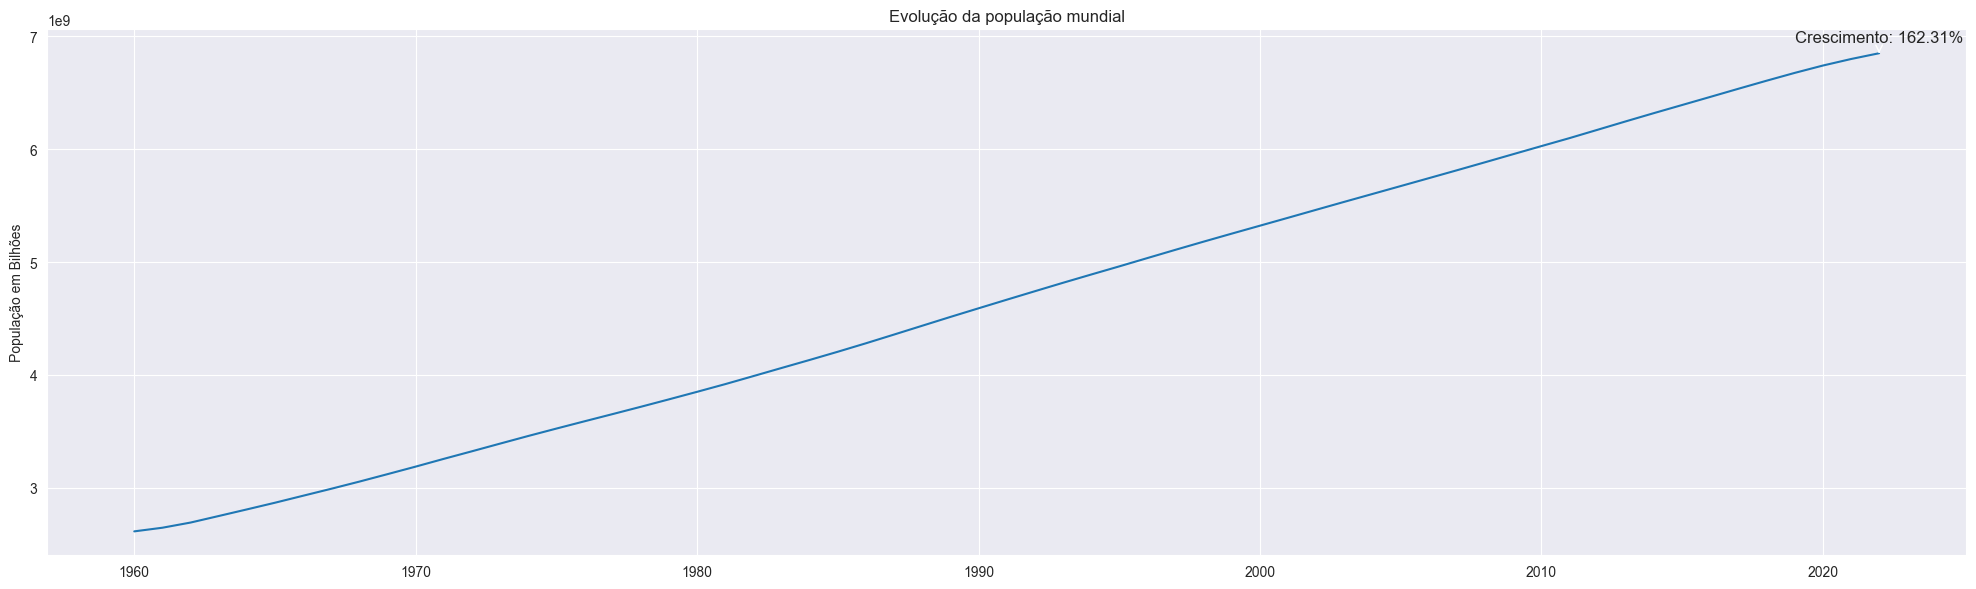

In [159]:
# calculando o crescimento entre 1960 e 2022
# agrupando dados por ano
pop_mundial = dados.groupby('year')['population'].sum().reset_index()

pop_mundial_1960 = pop_mundial.query('year == 1960')['population'].values[0]
pop_mundial_2022 = pop_mundial.query('year == 2022')['population'].values[0]
crescimento_populacao = (pop_mundial_2022 - pop_mundial_1960) / pop_mundial_1960 * 100

# criando figura
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))

# formatando o gráfico
sns.lineplot(data=pop_mundial, x='year', y='population', ax=ax)
ax.set_title('Evolução da população mundial')
ax.set_ylabel('População em Bilhões')
ax.set_xlabel('')


# Adicionar anotação no gráfico
ax.annotate(f'Crescimento: {crescimento_populacao:.2f}%', xy=(2022, pop_mundial_2022), xytext=(2022, pop_mundial_2022 + 1e8),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')


plt.tight_layout()
plt.show()

Entre os anos de 1960 e 2022 houve um crescimento de 162,31% da população.

In [165]:
# selecionando os dados de 1960 e 2022
populacao_pais_1960_2022 = dados.loc[dados['year'].isin([1960, 2022])]

# pivotando a coluna de anos
populacao_pais_1960_2022 = populacao_pais_1960_2022.pivot(index='country_name', columns='year', values=['population', 'total_gdp_million']).reset_index()
populacao_pais_1960_2022.columns = ['country_name', 'population_1960', 'population_2022', 'total_gdp_million_1960', 'total_gdp_million_2022']

# diferenca da população em percentual
populacao_pais_1960_2022['crescimento_populacao_%'] = (populacao_pais_1960_2022['population_2022'] - populacao_pais_1960_2022['population_1960']) / populacao_pais_1960_2022['population_1960'] * 100
# diferenca da população em numero absoluto
populacao_pais_1960_2022['diferenca_absoluta_pop'] = populacao_pais_1960_2022['population_2022'] - populacao_pais_1960_2022['population_1960']

# diferenca do PIB em numero absoluto
populacao_pais_1960_2022['diferenca_absoluta_pib'] = populacao_pais_1960_2022['total_gdp_million_2022'] - populacao_pais_1960_2022['total_gdp_million_1960']

print(populacao_pais_1960_2022.dtypes)

country_name                object
population_1960            float64
population_2022            float64
total_gdp_million_1960     float64
total_gdp_million_2022     float64
crescimento_populacao_%    float64
diferenca_absoluta_pop     float64
crescimento_pib_%           object
diferenca_absoluta_pib     float64
dtype: object


In [166]:
# top 15 países com maior diferenca populacional em percentual
crescimento_perc_populacao_pais_1960_2022 = populacao_pais_1960_2022.sort_values(by='crescimento_populacao_%', ascending=False).head(15)

# top 15 países com maior diferenca populacional em numeros absolutos
crescimento_abs_populacao_pais_1960_2022 = populacao_pais_1960_2022.sort_values(by='diferenca_absoluta_pop', ascending=False).head(15)

# top 15 países com maior diferenca do PIB em numeros absolutos
crescimento_abs_pib_pais_1960_2022 = populacao_pais_1960_2022.sort_values(by='diferenca_absoluta_pib', ascending=False).head(15)

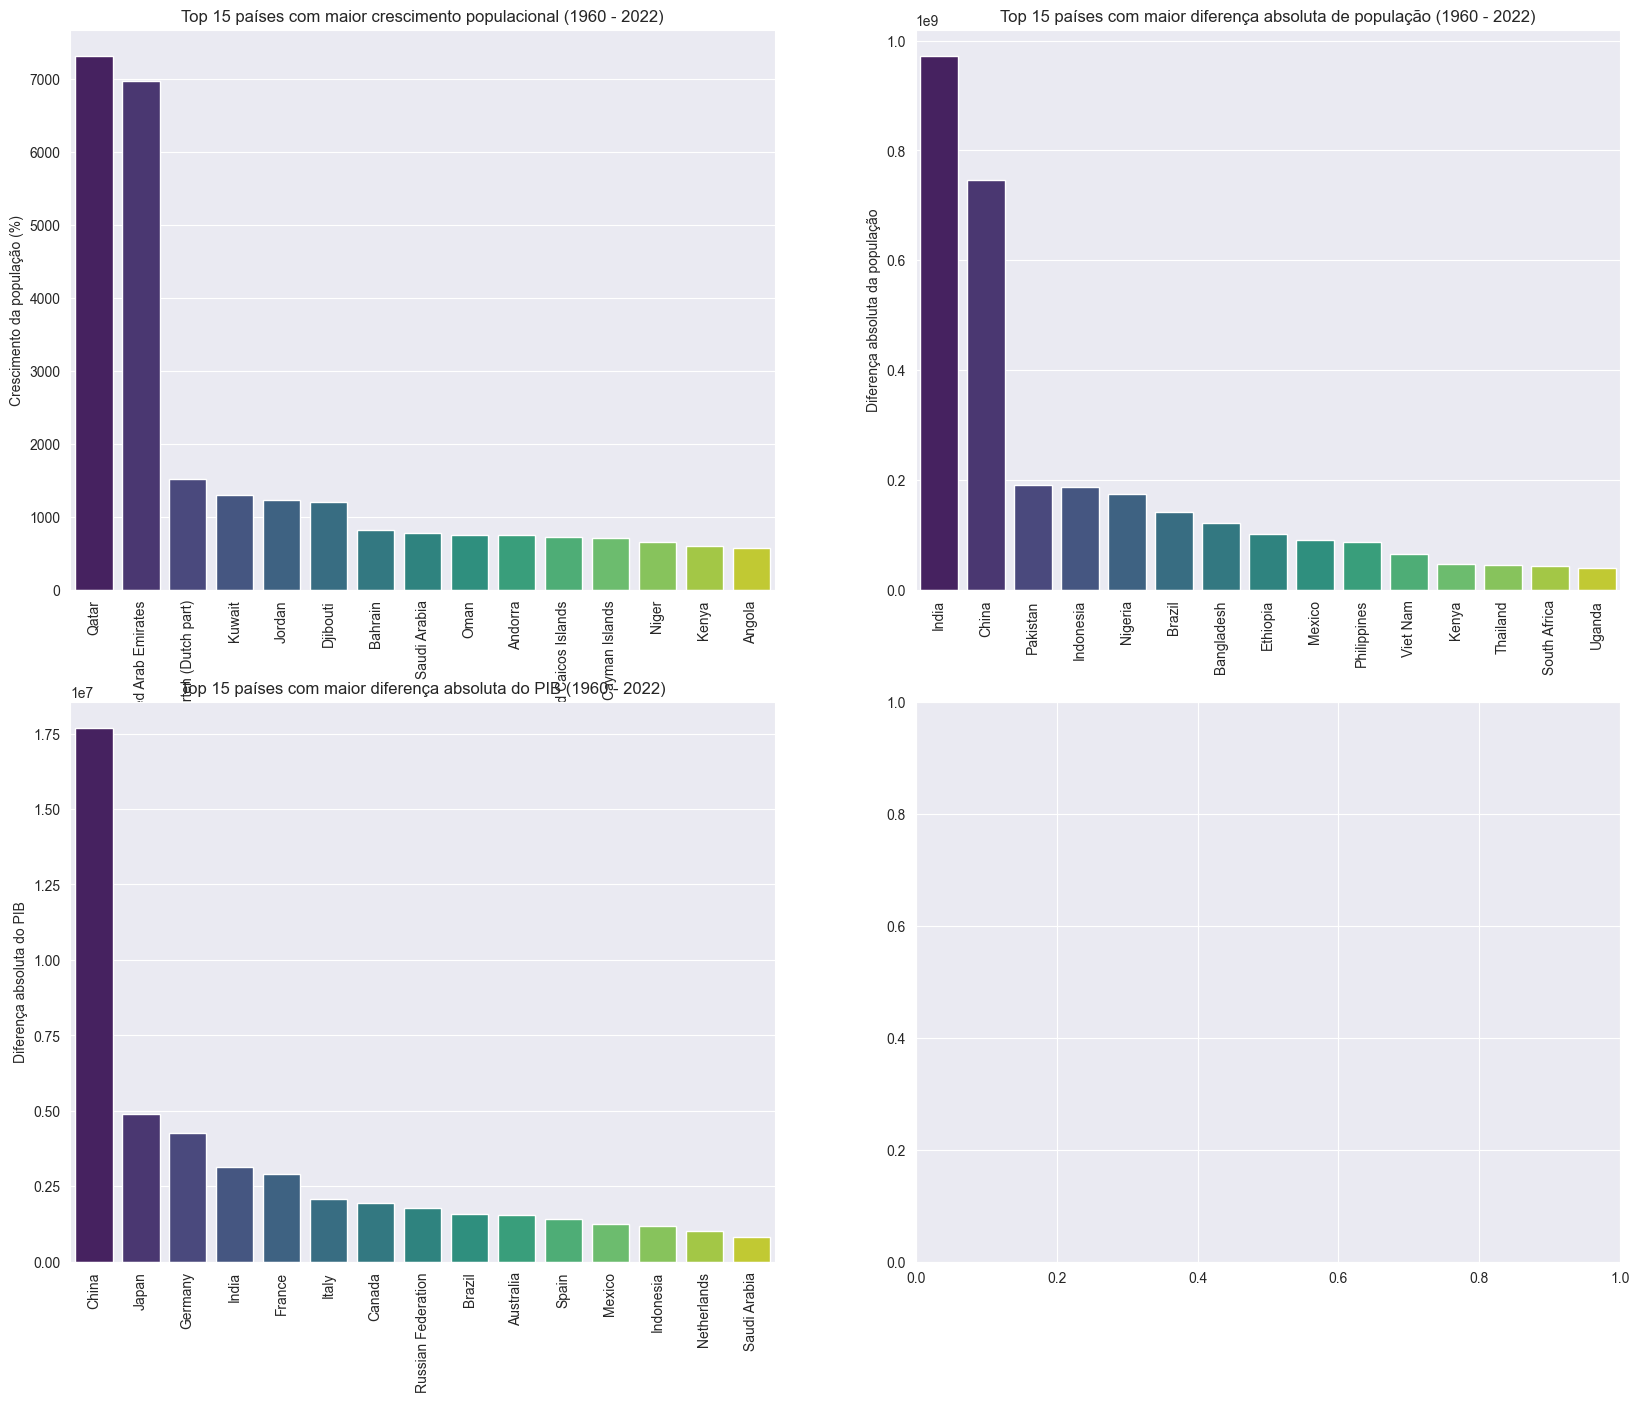

In [168]:
# plotando gráfico
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2 ,figsize=(20, 16))

# primeiro gráfico
sns.barplot(data=crescimento_perc_populacao_pais_1960_2022, x='country_name', y='crescimento_populacao_%', ax=ax[0][0], palette='viridis')
ax[0][0].set_title('Top 15 países com maior crescimento populacional (1960 - 2022)')
ax[0][0].set_ylabel('Crescimento da população (%)')
ax[0][0].set_xlabel('')
ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=90)

# segundo gráfico
sns.barplot(data=crescimento_abs_populacao_pais_1960_2022, x='country_name', y='diferenca_absoluta_pop', ax=ax[0][1], palette='viridis')
ax[0][1].set_title('Top 15 países com maior diferença absoluta de população (1960 - 2022)')
ax[0][1].set_ylabel('Diferença absoluta da população')
ax[0][1].set_xlabel('')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=90)

# terceiro gráfico
sns.barplot(data=crescimento_abs_pib_pais_1960_2022, x='country_name', y='diferenca_absoluta_pib', ax=ax[1][0], palette='viridis')
ax[1][0].set_title('Top 15 países com maior diferença absoluta do PIB (1960 - 2022)')
ax[1][0].set_ylabel('Diferença absoluta do PIB')
ax[1][0].set_xlabel('')
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=90)

plt.show()

- Os países com maior crescimento percentual são Qatar e Emirados Árabe
- Os países com maior crescimento populacional em números absolutos são a Arabia Saudita e Costa do Marfim.

Porém é importante avaliar um também os dados econômicos, pois podemos ter paises populosos com um indice econômico baixo onde as pessoas tendem a gastar com suprimentos básicos ao invés de Fast Food.

- Observando o ponto econômico podemos observar que China, Japão, Alemanha entre outros tiveram evolução notável por serem paises colonizados anteriormente a 1960.